# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [17]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [9]:
# importing data
df = pd.read_csv('Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [10]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
df_copy = df.copy()

#
label_encoder = LabelEncoder()
scaler = StandardScaler()

# normalizing numerical values Date, CarCount ,BikeCount , BusCount, TruckCount, Total
numeric_features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Date']
df_copy[numeric_features] = scaler.fit_transform(df_copy[numeric_features])

# doing one hot encoding for categorical features
# one hot encoding weekdays column
unique_weekdays = df_copy['Day of the week'].unique()
lookup_weekdays = tf.keras.layers.StringLookup(vocabulary=unique_weekdays, output_mode='one_hot')
one_hot_weekdays = lookup_weekdays(tf.constant(df_copy['Day of the week'])).numpy()
one_hot_weekdays = one_hot_weekdays[:, 1:]
weekdays_df = pd.DataFrame(one_hot_weekdays, columns=unique_weekdays)

# one hot encoding time 
unique_time  = df_copy['Time'].unique()
lookup_time = tf.keras.layers.StringLookup(vocabulary=unique_time, output_mode='one_hot')
one_hot_time = lookup_time(tf.constant(df_copy['Time'])).numpy()
one_hot_time = one_hot_time[:, 1:]
time_df = pd.DataFrame(one_hot_time, columns=unique_time)

# integer encoding the labels
df_copy['Traffic Situation'] = label_encoder.fit_transform(df_copy['Traffic Situation'])

# droping old columns
df_copy.drop(['Time', 'Day of the week',], axis=1, inplace=True)

# final data frame
df_final = pd.concat([df_copy, weekdays_df, time_df], axis=1)

df_final.head()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Tuesday,Wednesday,Thursday,...,9:30:00 PM,9:45:00 PM,10:00:00 PM,10:15:00 PM,10:30:00 PM,10:45:00 PM,11:00:00 PM,11:15:00 PM,11:30:00 PM,11:45:00 PM
0,-0.67082,-0.822297,-1.161302,-0.786604,-1.068183,-1.249880,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.67082,-0.429653,-1.161302,-0.856341,-1.162505,-0.984013,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.67082,-0.495094,-1.161302,-0.856341,-0.879540,-0.984013,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.67082,-0.386026,-1.161302,-0.926078,-0.973862,-0.934163,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.67082,-0.255144,-0.694207,-0.019496,0.063673,-0.335963,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
# spliting data
x = df_final.drop("Traffic Situation", axis=1)
y = df_final["Traffic Situation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques

Epoch 1/100
84/84 - 3s - 31ms/step - accuracy: 0.7317 - loss: 1.9172 - val_accuracy: 0.8627 - val_loss: 1.0622
Epoch 2/100
84/84 - 0s - 5ms/step - accuracy: 0.8493 - loss: 0.9233 - val_accuracy: 0.8459 - val_loss: 0.7461
Epoch 3/100
84/84 - 0s - 5ms/step - accuracy: 0.8703 - loss: 0.6941 - val_accuracy: 0.9202 - val_loss: 0.5890
Epoch 4/100
84/84 - 0s - 5ms/step - accuracy: 0.8721 - loss: 0.6229 - val_accuracy: 0.8501 - val_loss: 0.6305
Epoch 5/100
84/84 - 0s - 5ms/step - accuracy: 0.8733 - loss: 0.5739 - val_accuracy: 0.9006 - val_loss: 0.5156
Epoch 6/100
84/84 - 1s - 8ms/step - accuracy: 0.8818 - loss: 0.5297 - val_accuracy: 0.8908 - val_loss: 0.5124
Epoch 7/100
84/84 - 0s - 5ms/step - accuracy: 0.8908 - loss: 0.5054 - val_accuracy: 0.9090 - val_loss: 0.4618
Epoch 8/100
84/84 - 0s - 5ms/step - accuracy: 0.8950 - loss: 0.4897 - val_accuracy: 0.9230 - val_loss: 0.4346
Epoch 9/100
84/84 - 0s - 5ms/step - accuracy: 0.8944 - loss: 0.4793 - val_accuracy: 0.9160 - val_loss: 0.4354
Epoch 10/

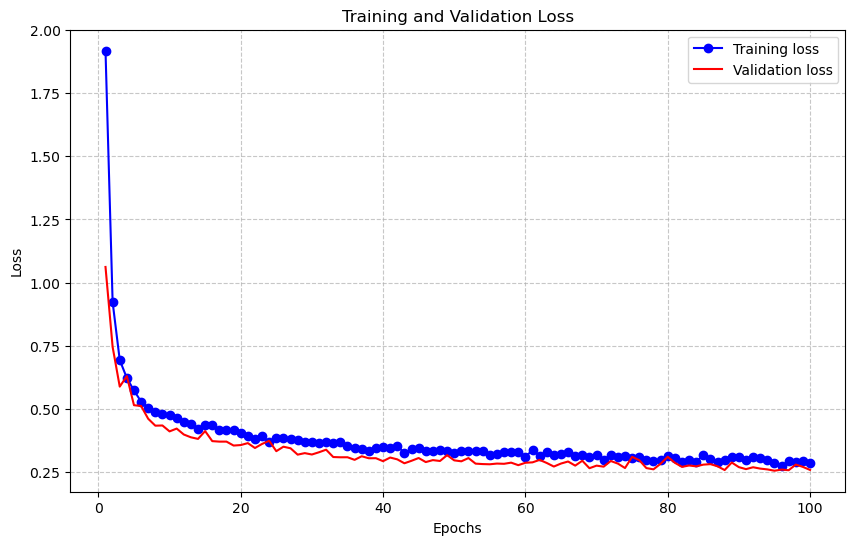

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Confusion Matrix:
[[127   0   0   0]
 [  3  54   0   6]
 [  0   0  64   2]
 [  7   8   2 323]]
Accuracy: 0.9530


In [12]:
# with Optimization
model1 = Sequential([
    Input(shape=(x_train.shape[1],)), 
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),  
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])    

# 
model1.compile(
    optimizer=Adam(learning_rate=0.002),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history1 = model1.fit(
    x_train, y_train, 
    epochs=100, 
    batch_size=20, 
    validation_split=0.30,
    callbacks=[early_stopping],
    verbose=2
)


def loss_curve_plot1(history1):
    loss = history1.history['loss']
    val_loss = history1.history['val_loss']
    epochs = range(1, len(loss) + 1)    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

loss_curve_plot1(history1)

# 
y_pred = np.argmax(model1.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Task: Print out the Final Model Accuracy and plot the Loss curve

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/100
84/84 - 3s - 30ms/step - accuracy: 0.7329 - loss: 1.9289 - val_accuracy: 0.8235 - val_loss: 1.1132
Epoch 2/100
84/84 - 0s - 5ms/step - accuracy: 0.8313 - loss: 0.9347 - val_accuracy: 0.8922 - val_loss: 0.7247
Epoch 3/100
84/84 - 1s - 8ms/step - accuracy: 0.8679 - loss: 0.7159 - val_accuracy: 0.9202 - val_loss: 0.5988
Epoch 4/100
84/84 - 0s - 6ms/step - accuracy: 0.8697 - loss: 0.6165 - val_accuracy: 0.8866 - val_loss: 0.5428
Epoch 5/100
84/84 - 0s - 5ms/step - accuracy: 0.8794 - loss: 0.5618 - val_accuracy: 0.9202 - val_loss: 0.4882
Epoch 6/100
84/84 - 0s - 5ms/step - accuracy: 0.8914 - loss: 0.5253 - val_accuracy: 0.9328 - val_loss: 0.4633
Epoch 7/100
84/84 - 0s - 5ms/step - accuracy: 0.8908 - loss: 0.5026 - val_accuracy: 0.9272 - val_loss: 0.4398
Epoch 8/100
84/84 - 0s - 5ms/step - accuracy: 0.8896 - loss: 0.4901 - val_accuracy: 0.9384 - val_loss: 0.4294
Epoch 9/100
84/84 - 0s - 5ms/step - accuracy: 0.9046 - loss: 0.4668 - val_accuracy: 0.9398 - val_loss: 0.4080
Epoch 10/

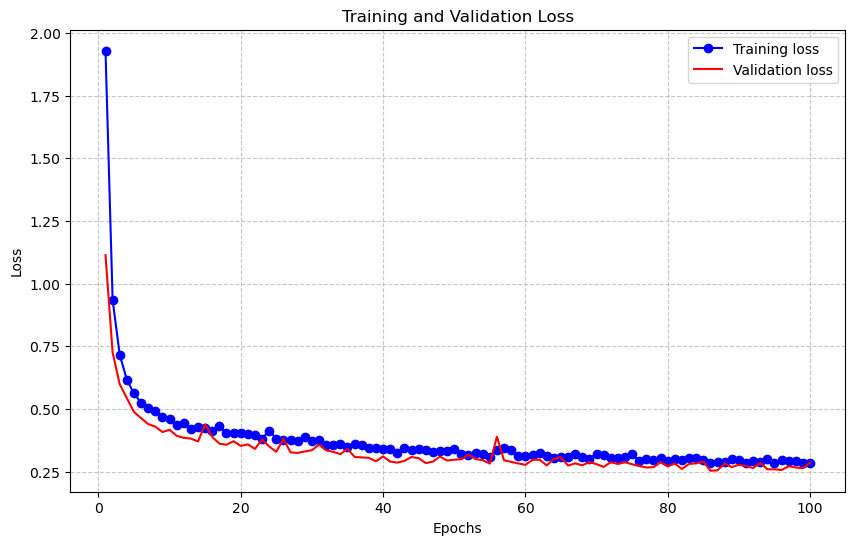

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[123   2   0   2]
 [  0  57   0   6]
 [  0   0  63   3]
 [  3   8   0 329]]
Accuracy: 0.9597


In [13]:
# #TODO:
# model_2 = define_model('Adam', None)
# loss_curve_plot(model_2):
# #print out confusion matrix and error analysis metrics after the cell


# with adam no early stoping 
model2 = Sequential([
    Input(shape=(x_train.shape[1],)), 
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),  
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])    

# 
model2.compile(
    optimizer=Adam(learning_rate=0.002),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    x_train, y_train, 
    epochs=100, 
    batch_size=20, 
    validation_split=0.30,
    verbose=2
)


def loss_curve_plot2(history2):
    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    epochs = range(1, len(loss) + 1)    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

loss_curve_plot2(history2)

y_pred = np.argmax(model2.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/100
84/84 - 2s - 24ms/step - accuracy: 0.7617 - loss: 1.7196 - val_accuracy: 0.8641 - val_loss: 0.9764
Epoch 2/100
84/84 - 0s - 5ms/step - accuracy: 0.8451 - loss: 0.8611 - val_accuracy: 0.8501 - val_loss: 0.7140
Epoch 3/100
84/84 - 0s - 5ms/step - accuracy: 0.8595 - loss: 0.6787 - val_accuracy: 0.8557 - val_loss: 0.6168
Epoch 4/100
84/84 - 1s - 8ms/step - accuracy: 0.8788 - loss: 0.5945 - val_accuracy: 0.9202 - val_loss: 0.5419
Epoch 5/100
84/84 - 1s - 8ms/step - accuracy: 0.8788 - loss: 0.5545 - val_accuracy: 0.9062 - val_loss: 0.4945
Epoch 6/100
84/84 - 1s - 9ms/step - accuracy: 0.8848 - loss: 0.5249 - val_accuracy: 0.8810 - val_loss: 0.4784
Epoch 7/100
84/84 - 0s - 5ms/step - accuracy: 0.8866 - loss: 0.5072 - val_accuracy: 0.9090 - val_loss: 0.4517
Epoch 8/100
84/84 - 1s - 8ms/step - accuracy: 0.8872 - loss: 0.4876 - val_accuracy: 0.9160 - val_loss: 0.4500
Epoch 9/100
84/84 - 1s - 8ms/step - accuracy: 0.8986 - loss: 0.4626 - val_accuracy: 0.9174 - val_loss: 0.4161
Epoch 10/

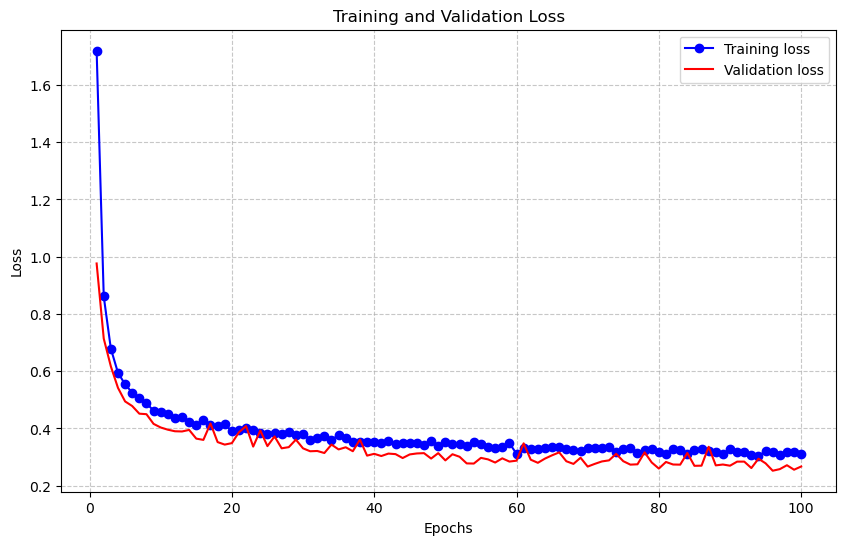

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
[[125   0   0   2]
 [  1  55   0   7]
 [  0   0  66   0]
 [  4   8  13 315]]
Accuracy: 0.9413


In [14]:
# #TODO:
# model_3 = define_model('RMSPop',None)
# loss_curve_plot(model_3):
# #print out confusion matrix and error analysis metrics after the cell


# with rmspop no early stoping 
model3 = Sequential([
    Input(shape=(x_train.shape[1],)), 
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),  
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])    

# 
model3.compile(
    optimizer=RMSprop(learning_rate=0.002),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    x_train, y_train, 
    epochs=100, 
    batch_size=20, 
    validation_split=0.30,
    verbose=2
)


def loss_curve_plot3(history3):
    loss = history3.history['loss']
    val_loss = history3.history['val_loss']
    epochs = range(1, len(loss) + 1)    
    # Plot training & validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

loss_curve_plot3(history3)

y_pred = np.argmax(model3.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/100
84/84 - 2s - 26ms/step - accuracy: 0.7191 - loss: 2.2871 - val_accuracy: 0.7787 - val_loss: 1.5863
Epoch 2/100
84/84 - 1s - 12ms/step - accuracy: 0.7953 - loss: 1.3336 - val_accuracy: 0.8557 - val_loss: 1.0071
Epoch 3/100
84/84 - 0s - 6ms/step - accuracy: 0.8427 - loss: 0.9421 - val_accuracy: 0.8880 - val_loss: 0.7965
Epoch 4/100
84/84 - 0s - 5ms/step - accuracy: 0.8535 - loss: 0.7833 - val_accuracy: 0.9062 - val_loss: 0.6791
Epoch 5/100
84/84 - 1s - 6ms/step - accuracy: 0.8697 - loss: 0.6893 - val_accuracy: 0.8978 - val_loss: 0.6101
Epoch 6/100
84/84 - 1s - 7ms/step - accuracy: 0.8721 - loss: 0.6302 - val_accuracy: 0.9160 - val_loss: 0.5668
Epoch 7/100
84/84 - 0s - 5ms/step - accuracy: 0.8848 - loss: 0.5944 - val_accuracy: 0.9118 - val_loss: 0.5251
Epoch 8/100
84/84 - 0s - 5ms/step - accuracy: 0.8824 - loss: 0.5579 - val_accuracy: 0.9272 - val_loss: 0.5011
Epoch 9/100
84/84 - 0s - 5ms/step - accuracy: 0.8848 - loss: 0.5357 - val_accuracy: 0.8964 - val_loss: 0.4876
Epoch 10

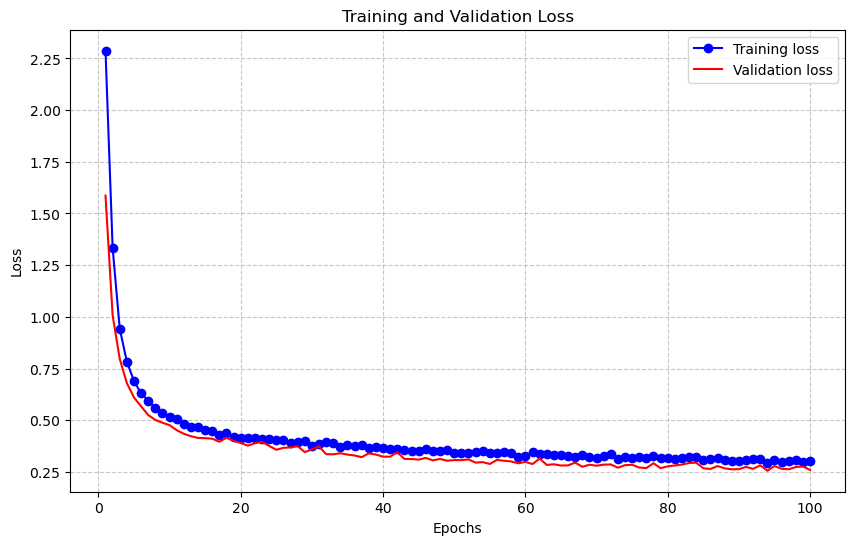

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
[[124   1   0   2]
 [  0  54   0   9]
 [  0   0  62   4]
 [  3   7   1 329]]
Accuracy: 0.9547


In [15]:
# #TODO:
# model_4 = define_model(None)
# loss_curve_plot(model_4):
# #print out confusion matrix and error analysis metrics after the cell



# 
model4 = Sequential([
    Input(shape=(x_train.shape[1],)), 
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),  
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])    

# 
model4.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history4 = model4.fit(
    x_train, y_train, 
    epochs=100, 
    batch_size=20, 
    validation_split=0.30,
    verbose=2
)


def loss_curve_plot4(history4):
    loss = history4.history['loss']
    val_loss = history4.history['val_loss']
    epochs = range(1, len(loss) + 1)    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

loss_curve_plot4(history4)

y_pred = np.argmax(model4.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [56]:
# saving best model
model1.save('best_model.keras')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Confusion Matrix:
[[126   0   0   1]
 [  2  55   0   6]
 [  0   0  64   2]
 [  8   6   3 323]]
F1 Score: 0.9529


<Figure size 600x400 with 0 Axes>

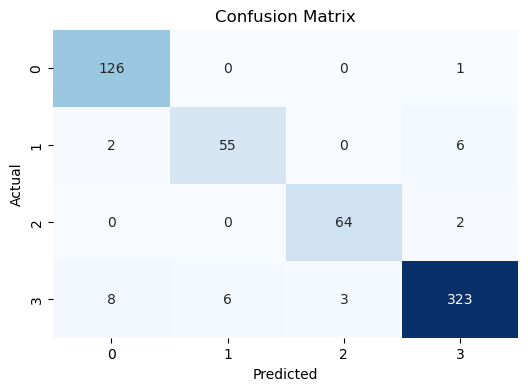

In [18]:
def make_predictions(model_path, X):
    model = load_model('best_model.keras', compile=False)
    pred_probs = model.predict(X)
    predictions = np.argmax(pred_probs, axis=1)
    return predictions


# predictions
y_pred = make_predictions('best_model.keras', x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()